This script plots chosen coastal points and temperature field

## Import modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd

## Read input data

In [2]:
points = pd.read_csv('data/csv/merged_points.csv', index_col = 0)

In [3]:
data_path = (
    "/home/jovyan/shared_data/data/copernicus/"
    "GLOBAL_ANALYSISFORECAST_PHY_001_024/"
    "cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_thetao_28.00W-12.00W_8.00N-20.00N_0.49-5727.92m_2020-11-01-2024-03-15.zarr"
)

ds = xr.open_zarr(data_path)
temp = ds.thetao

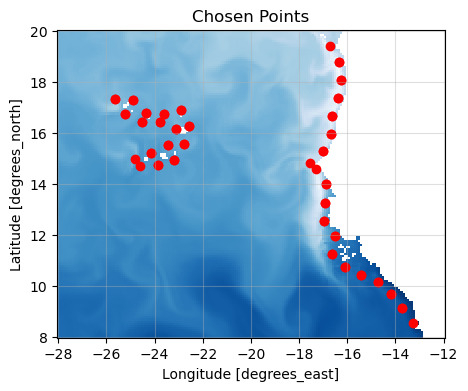

In [11]:
# visualize the chosen coastal points
(
    temp
    .sel(time='2024-03-04')
    .sel(depth=0, method='nearest')
    .plot(figsize=(5,4),cmap='Blues',add_colorbar=False)

)

(
    plt.scatter(x = points.lon_A, y = points.lat_A, c='red')
)


(
    plt.scatter(x = points.lon_B, y = points.lat_B, c='red')
)
plt.grid(alpha=0.4)
plt.gca().set_title('Chosen Points');
plt.savefig('figure/points.jpg', dpi=600, bbox_inches='tight')


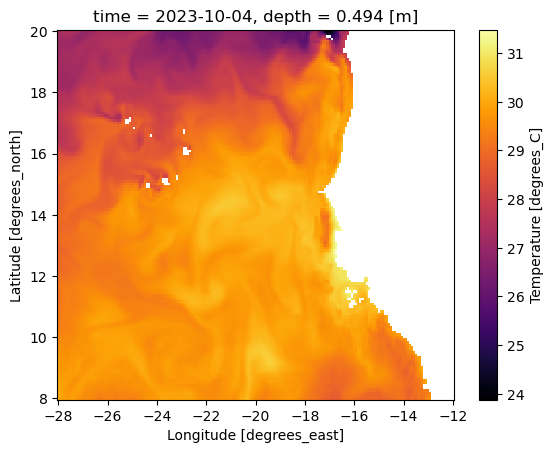

In [109]:
# Visualizing a date without an upwelling event. Surface perspective.

time = '2023-10-04'
(temp.sel(time=time).isel(depth=0).plot(cmap='inferno'))
plt.savefig('figure/notupwelling_t.jpg', dpi=600)

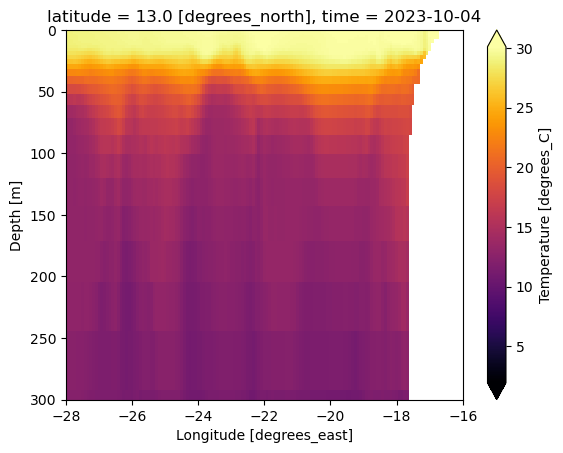

In [112]:
# Visualizing a date without an upwelling event. Depth perspective.

temp.sel(time=time, latitude = 13, method='nearest').plot(cmap='inferno',robust=True)

plt.xlim(-28,-16)
plt.ylim(0,300)
plt.gca().invert_yaxis()
plt.savefig('figure/notupwelling_t_depth.jpg', dpi=600)